In [1]:
from data import GateDataHandler, BinanceDataHandler
from analysis_utils import AnalysisUtils

import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

gdata_handler = GateDataHandler()
bdata_handler = BinanceDataHandler()
analyzer = AnalysisUtils()

### 0. Functions to get klines diff and fr
- On both Binance and Gate
- Diff = (B - G) * 100% / B 

### 1. EDA for AIOT

In [3]:
aiot = analyzer.get_futures_diff('AIOTUSDT', interval='5m', limit=1500)
print(aiot.info())
print(aiot.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1500 entries, 2025-06-01 13:55:00 to 2025-06-06 18:50:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   b_close   1500 non-null   float64
 1   g_close   1500 non-null   float64
 2   diff_pct  1500 non-null   float64
dtypes: float64(3)
memory usage: 46.9 KB
None
                     b_close  g_close  diff_pct
Date                                           
2025-06-01 13:55:00  0.14468  0.14465  0.000207
2025-06-01 14:00:00  0.14956  0.14951  0.000334
2025-06-01 14:05:00  0.15174  0.15163  0.000725
2025-06-01 14:10:00  0.15195  0.15219 -0.001579
2025-06-01 14:15:00  0.15174  0.15231 -0.003756


In [4]:
aiot_fr = analyzer.get_futures_fr('AIOTUSDT')
print(aiot_fr.info())
print(aiot_fr.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2025-05-07 20:00:00 to 2025-06-06 16:00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   binance_fr  180 non-null    object 
 1   gate_fr     180 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB
None
                     binance_fr   gate_fr
funding_time                             
2025-05-07 20:00:00  0.00109894  0.000704
2025-05-08 00:00:00  0.00005000  0.000368
2025-05-08 04:00:00  0.00079838  0.000420
2025-05-08 08:00:00  0.00066934  0.000950
2025-05-08 12:00:00  0.00082774  0.000240


In [5]:
aiot = analyzer.merge_diff_fr('AIOTUSDT')
print(aiot.head())
print(aiot.info())

                     b_close  g_close  diff_pct binance_fr  gate_fr
Date                                                               
2025-06-01 13:55:00  0.14468  0.14465  0.000207        NaN      NaN
2025-06-01 14:00:00  0.14956  0.14951  0.000334        NaN      NaN
2025-06-01 14:05:00  0.15174  0.15163  0.000725        NaN      NaN
2025-06-01 14:10:00  0.15195  0.15219 -0.001579        NaN      NaN
2025-06-01 14:15:00  0.15174  0.15231 -0.003756        NaN      NaN
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1500 entries, 2025-06-01 13:55:00 to 2025-06-06 18:50:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   b_close     1500 non-null   float64
 1   g_close     1500 non-null   float64
 2   diff_pct    1500 non-null   float64
 3   binance_fr  31 non-null     object 
 4   gate_fr     31 non-null     float64
dtypes: float64(4), object(1)
memory usage: 70.3+ KB
None


In [6]:
aiot['diff_pct'].describe()

count    1500.000000
mean        0.001692
std         0.002181
min        -0.006455
25%         0.000302
50%         0.001710
75%         0.003079
max         0.015328
Name: diff_pct, dtype: float64

In [7]:
aiot['diff_pct'].describe()['50%']

0.001710454688990352

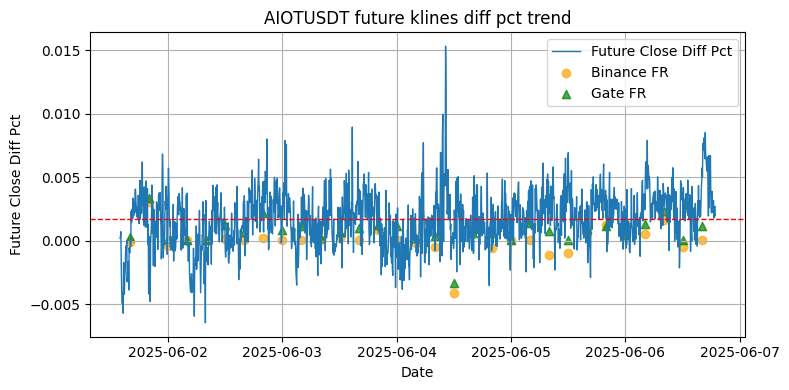

In [8]:
analyzer.plot_diff_fr(aiot, 'AIOTUSDT')

In [9]:
quantile = aiot['diff_pct'].quantile([i/10 for i in range(11)])
quantile.name = 'aiot'
quantile

0.0   -0.006455
0.1   -0.000824
0.2   -0.000071
0.3    0.000571
0.4    0.001199
0.5    0.001710
0.6    0.002203
0.7    0.002767
0.8    0.003415
0.9    0.004298
1.0    0.015328
Name: aiot, dtype: float64

### 2. Kline diff for all symbols

In [10]:
# 获取两个平台的合约
# Gate
gate_symbols = gdata_handler.gate_get_funding_rates()['symbol'].tolist()
gate_symbols = [s.replace("_USDT","USDT") for s in gate_symbols]
print(len(gate_symbols))

# Binance
b_symbol_status = bdata_handler.bi_get_all_contract_status()
trading_symbols = b_symbol_status[b_symbol_status['status']=='TRADING']['symbol'].tolist()
binance_symbols = [s['symbol'] for s in bdata_handler.client.futures_exchange_info()['symbols']]
binance_symbols = [s for s in binance_symbols if s in trading_symbols]
print(len(binance_symbols))

575
465


In [11]:
# 合并上述两个列表，取共同的symbols
mutual_symbols = [s for s in gate_symbols if s in binance_symbols]
print(len(mutual_symbols))

396


In [13]:
description_all = []
for s in mutual_symbols:
    print(f"processing data for {s}...")
    klines = analyzer.get_futures_diff(symbol=s, interval='5m', limit=1500)
    description = klines['diff_pct'].quantile([i/10 for i in range(11)])
    description.name = s
    description_all.append(description)

processing data for AIOTUSDT...
processing data for MEMEFIUSDT...
processing data for REIUSDT...
processing data for SKYAIUSDT...
processing data for EPTUSDT...
processing data for THETAUSDT...
processing data for BICOUSDT...
processing data for XVSUSDT...
processing data for CRVUSDT...
processing data for CELOUSDT...
processing data for ADAUSDT...
processing data for PHBUSDT...
processing data for RLCUSDT...
processing data for MAVUSDT...
processing data for CKBUSDT...
processing data for BLURUSDT...
processing data for PENDLEUSDT...
processing data for HOTUSDT...
processing data for MKRUSDT...
processing data for ALICEUSDT...
processing data for OGUSDT...
processing data for GRTUSDT...
processing data for STXUSDT...
processing data for BAKEUSDT...
processing data for CVCUSDT...
processing data for FETUSDT...
processing data for SNXUSDT...
processing data for IDUSDT...
processing data for LQTYUSDT...
processing data for ONEUSDT...
processing data for SSVUSDT...
processing data for AAV

In [14]:
diff_all = pd.concat([d for d in description_all], axis=1)
diff_all = diff_all.T

In [15]:
diff_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, AIOTUSDT to MASKUSDT
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0     396 non-null    float64
 1   0.1     396 non-null    float64
 2   0.2     396 non-null    float64
 3   0.3     396 non-null    float64
 4   0.4     396 non-null    float64
 5   0.5     396 non-null    float64
 6   0.6     396 non-null    float64
 7   0.7     396 non-null    float64
 8   0.8     396 non-null    float64
 9   0.9     396 non-null    float64
 10  1.0     396 non-null    float64
dtypes: float64(11)
memory usage: 37.1+ KB


In [16]:
diff_all.columns = ["quantile" + str(i) for i in range(11)]

In [17]:
diff_all.columns

Index(['quantile0', 'quantile1', 'quantile2', 'quantile3', 'quantile4', 'quantile5', 'quantile6', 'quantile7', 'quantile8', 'quantile9', 'quantile10'], dtype='object')

In [18]:
diff_all['range_2_8'] = diff_all['quantile8'] - diff_all['quantile2']
diff_all['range_2_7'] = diff_all['quantile7'] - diff_all['quantile2']

In [ ]:
# diff_all = pd.read_parquet(f'DATA/diff_all.parquet')

FileNotFoundError: [Errno 2] No such file or directory: 'analysis/DATA/diff_all_0606.parquet'

In [23]:
# symbols with high range
diff_high = diff_all[diff_all['range_2_8']>=0.005]
diff_high

,quantile0,quantile1,quantile2,quantile3,quantile4,quantile5,quantile6,quantile7,quantile8,quantile9,quantile10,range_2_8,range_2_7
NEIROUSDT,-1.923112,-1.765720,-1.703446,-1.673334,-1.638136,-1.598371,-1.566241,-1.525649,-1.432278,-1.312889,-1.123133,0.271168,0.177797
LOKAUSDT,-0.016578,-0.003012,-0.001170,-0.000165,0.000858,0.001645,0.002333,0.003410,0.004673,0.006531,0.030144,0.005843,0.004580
GHSTUSDT,-0.018162,-0.005468,-0.003193,-0.001789,-0.000731,0.000241,0.001098,0.002055,0.003394,0.005729,0.018228,0.006587,0.005249
FISUSDT,-0.021927,-0.007554,-0.006077,-0.005000,-0.004131,-0.003304,-0.002298,-0.001269,-0.000066,0.001859,0.012811,0.006011,0.004809
SYSUSDT,-0.020158,-0.004416,-0.003049,-0.002001,-0.001177,-0.000467,0.000460,0.001394,0.002511,0.003783,0.013517,0.005560,0.004442
TUSDT,-0.018367,-0.004608,-0.002522,-0.001325,-0.000662,0.000000,0.000697,0.001882,0.002766,0.004738,0.015509,0.005288,0.004404
ZILUSDT,-0.019641,-0.005044,-0.002534,-0.001435,-0.000558,0.000355,0.001109,0.002095,0.003336,0.004911,0.017876,0.005870,0.004629
BEAMXUSDT,-0.022001,-0.007104,-0.004799,-0.002952,-0.001698,-0.000812,0.000299,0.001386,0.002575,0.004658,0.018971,0.007373,0.006185
RVNUSDT,-0.015481,-0.002626,-0.001436,-0.000645,-0.000090,0.000624,0.001333,0.002141,0.004157,0.007684,0.032678,0.005592,0.003577
OXTUSDT,-0.047592,-0.006034,-0.003765,-0.002619,-0.001689,-0.000898,0.000000,0.000870,0.002128,0.004754,0.026201,0.005893,0.004635


In [ ]:
# today = "0606"
# diff_all.to_parquet(f'DATA/diff_all_{today}.parquet')

### 3. Other potential symbols

binance last 24hour vol in usdt is: 464040146.39309
gate last 24hour vol in usdt is: 28099356


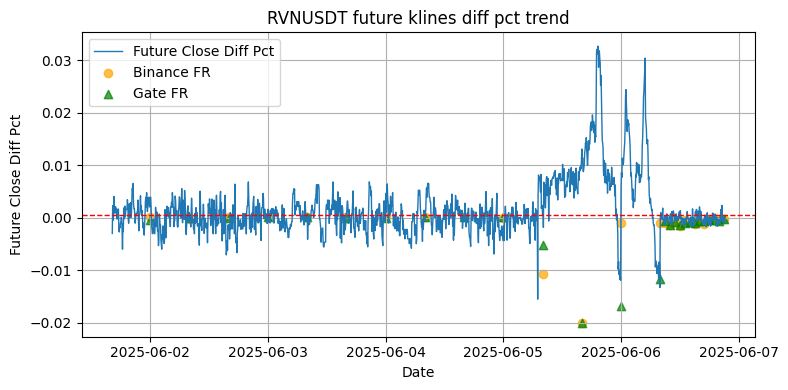

In [2]:
analyzer.full_analysis(symbol='RVNUSDT')

binance last 24hour vol in usdt is: 1640176.4779
gate last 24hour vol in usdt is: 14480


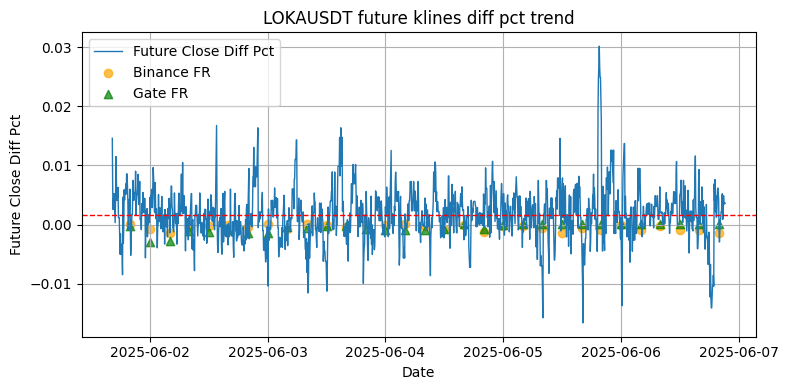

In [6]:
analyzer.full_analysis('LOKAUSDT')

binance last 24hour vol in usdt is: 16684445.06459
gate last 24hour vol in usdt is: 208344


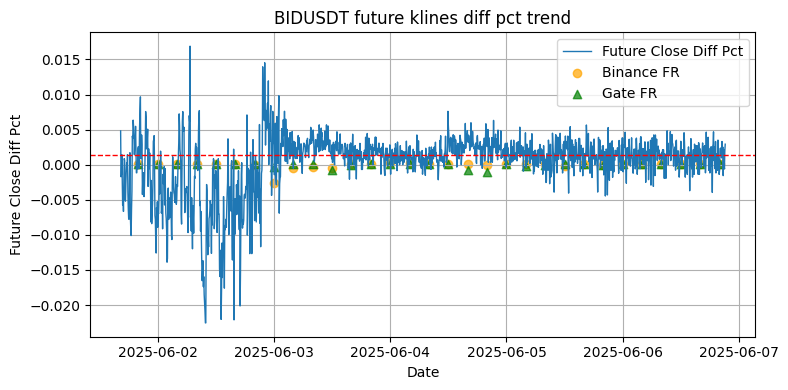

In [4]:
analyzer.full_analysis('BIDUSDT')

binance last 24hour vol in usdt is: 20189093844.35
gate last 24hour vol in usdt is: 5841379862


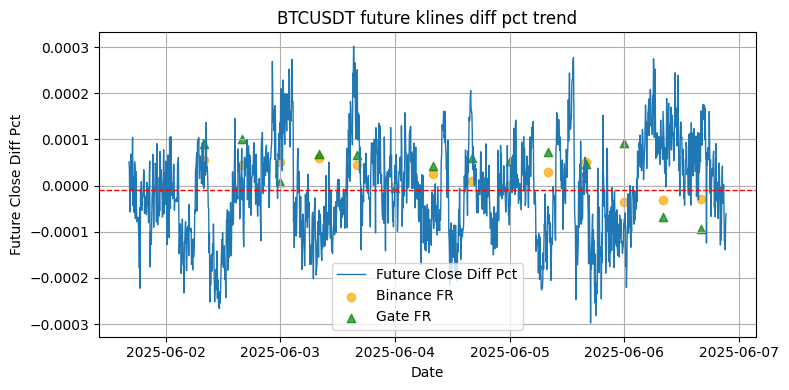

In [5]:
analyzer.full_analysis('BTCUSDT')